### DATASET: 

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable is RainTomorrow. This means: Did it rain the next day? Yes or No.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.metrics import cohen_kappa_score , roc_auc_score , accuracy_score , roc_curve
from sklearn.feature_selection import RFE 
import datetime

### ATTRIBUTE INFORMATION:  

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


1. 'Date'= The date of observation

2. 'Location'=The common name of the location of the weather station

3. 'MinTemp'= The minimum temperature in degrees celsius

4. 'MaxTemp'= The maximum temperature in degrees celsius

5. 'Rainfall' = The amount of rainfall recorded for the day in mm

6. 'Evaporation'= The so-called Class A pan evaporation (mm) in the 24 hours to 9am
       
7. 'Sunshine'= The number of hours of bright sunshine in the day.

8. 'WindGustDir'= The direction of the strongest wind gust in the 24 hours to midnight

9. 'WindGustSpeed'= The speed (km/h) of the strongest wind gust in the 24 hours to midnight

10. 'WindDir9am'= Direction of the wind at 9am

11. 'WindDir3pm' = Direction of the wind at 3pm

12. 'WindSpeed9am'= Wind speed (km/hr) averaged over 10 minutes prior to 9am

13. 'WindSpeed3pm'=  Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14. 'Humidity9am'= Humidity (percent) at 9am

15. 'Humidity3pm'= Humidity (percent) at 3pm

16. 'Pressure9am'= Atmospheric pressure (hpa) reduced to mean sea level at 9am

17. 'Pressure3pm'= Atmospheric pressure (hpa) reduced to mean sea level at 3pm

18. 'Cloud9am'= Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are

19. 'Cloud3pm'= Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

20. 'Temp9am'= Temperature (degrees C) at 9am
       
21. 'Temp3pm'=  Temperature (degrees C) at 3pm

22. 'RainToday'=  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

23. 'RISK_MM'= The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

24. 'RainTomorrow'= The target variable. Did it rain tomorrow?

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [2]:
# Kindly change the below cells from markdown to code and execute it 

In [2]:
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,...,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,Yes,78.6,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,...,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,Yes,0.0,No
2,29-06-2014,Penrith,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,...,41.0,NaN,NaN,NaN,NaN,13.1,15.1,No,0.0,No
3,16-12-2008,Cairns,25.5,33.9,0.2,5.0,7.0,SSE,41.0,SSE,...,59.0,1009.8,1007.4,6.0,5.0,30.8,31.5,No,0.0,No
4,21-04-2015,SalmonGums,3.8,23.0,0.0,NaN,NaN,N,28.0,NE,...,29.0,NaN,NaN,NaN,NaN,14.0,21.1,No,0.0,No


### 2.	Summarize important observations from the data set



a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [3]:
#a. Find out number of rows; no. & types of variables (continuous, categorical etc.)
df.shape # 1040 rows and 24 columns 

(1040, 24)

In [4]:
df.info()
# There are 7 categorical columns and 17 numerical columns but the datatype of date is given as object 
# which needs to be changed to datetime 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 24 columns):
Date             1040 non-null object
Location         1040 non-null object
MinTemp          1035 non-null float64
MaxTemp          1035 non-null float64
Rainfall         1029 non-null float64
Evaporation      582 non-null float64
Sunshine         533 non-null float64
WindGustDir      969 non-null object
WindGustSpeed    969 non-null float64
WindDir9am       981 non-null object
WindDir3pm       1014 non-null object
WindSpeed9am     1032 non-null float64
WindSpeed3pm     1023 non-null float64
Humidity9am      1031 non-null float64
Humidity3pm      1016 non-null float64
Pressure9am      929 non-null float64
Pressure3pm      932 non-null float64
Cloud9am         613 non-null float64
Cloud3pm         597 non-null float64
Temp9am          1034 non-null float64
Temp3pm          1022 non-null float64
RainToday        1029 non-null object
RISK_MM          1040 non-null float64
RainTomorro

In [5]:
#b. Calculate five-point summary for numerical variables
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,1035.000000,1035.000000,1029.00000,582.000000,533.000000,969.000000,1032.000000,1023.000000,1031.000000,1016.000000,929.000000,932.000000,613.000000,597.000000,1034.000000,1022.000000,1040.000000
mean,12.008019,23.055942,2.18552,5.183505,7.606379,40.026832,13.768411,18.414467,69.535403,51.698819,1017.277718,1014.931438,4.592170,4.447236,16.794584,21.477495,2.158365
std,6.176816,6.809834,7.50278,3.426213,3.756107,13.703520,8.350102,8.446346,18.204141,20.227374,7.353785,7.243600,2.897498,2.745218,6.101344,6.665932,7.634139
min,-4.100000,-0.800000,0.00000,0.400000,0.000000,9.000000,0.000000,0.000000,6.000000,3.000000,986.300000,989.300000,0.000000,0.000000,-2.800000,-2.900000,0.000000
25%,7.500000,17.900000,0.00000,2.650000,5.000000,31.000000,7.000000,13.000000,58.000000,37.000000,1012.700000,1010.000000,1.000000,2.000000,12.300000,16.400000,0.000000
50%,11.800000,22.500000,0.00000,4.400000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,6.000000,5.000000,16.600000,21.050000,0.000000
75%,16.350000,27.700000,0.80000,7.000000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.300000,1019.900000,7.000000,7.000000,20.900000,25.900000,0.600000
max,28.600000,43.900000,121.40000,25.600000,13.800000,113.000000,52.000000,54.000000,100.000000,100.000000,1040.200000,1035.700000,8.000000,8.000000,39.100000,42.400000,88.600000


In [6]:
df.duplicated().sum() # no duplicated records 

0

In [7]:
#c. Summarize observations for categorical variables – no. of categories, % observations in each category
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,1040,1040,969,981,1014,1029,1040
unique,890,49,16,16,16,2,2
top,23-07-2016,SalmonGums,W,N,SE,No,No
freq,4,33,80,85,84,788,829


In [8]:
#– no. of categories
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())

23-07-2016    4
16-06-2017    3
14-10-2013    3
03-05-2014    3
07-04-2015    3
22-03-2012    3
31-08-2010    3
16-12-2009    3
04-08-2009    3
21-04-2017    3
02-10-2013    3
22-07-2016    2
14-03-2017    2
23-05-2011    2
23-11-2016    2
22-02-2010    2
06-05-2011    2
27-04-2013    2
20-08-2016    2
16-05-2017    2
14-07-2010    2
30-06-2011    2
09-10-2010    2
09-10-2011    2
21-04-2012    2
06-02-2011    2
02-03-2016    2
24-04-2017    2
03-04-2016    2
05-06-2011    2
             ..
25-09-2009    1
25-10-2014    1
14-01-2015    1
04-12-2014    1
17-03-2009    1
02-03-2013    1
28-05-2012    1
31-08-2013    1
19-11-2008    1
20-10-2016    1
21-10-2013    1
01-01-2011    1
01-10-2012    1
25-04-2013    1
20-10-2009    1
25-11-2016    1
24-01-2014    1
31-03-2010    1
23-07-2010    1
26-04-2014    1
03-06-2011    1
30-03-2012    1
09-06-2017    1
28-06-2015    1
30-10-2011    1
15-11-2016    1
15-08-2010    1
19-12-2014    1
21-05-2017    1
19-06-2014    1
Name: Date, Length: 890,

In [9]:
# % observations in each category
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts(normalize=True)*100)

23-07-2016    0.384615
16-06-2017    0.288462
14-10-2013    0.288462
03-05-2014    0.288462
07-04-2015    0.288462
22-03-2012    0.288462
31-08-2010    0.288462
16-12-2009    0.288462
04-08-2009    0.288462
21-04-2017    0.288462
02-10-2013    0.288462
22-07-2016    0.192308
14-03-2017    0.192308
23-05-2011    0.192308
23-11-2016    0.192308
22-02-2010    0.192308
06-05-2011    0.192308
27-04-2013    0.192308
20-08-2016    0.192308
16-05-2017    0.192308
14-07-2010    0.192308
30-06-2011    0.192308
09-10-2010    0.192308
09-10-2011    0.192308
21-04-2012    0.192308
06-02-2011    0.192308
02-03-2016    0.192308
24-04-2017    0.192308
03-04-2016    0.192308
05-06-2011    0.192308
                ...   
25-09-2009    0.096154
25-10-2014    0.096154
14-01-2015    0.096154
04-12-2014    0.096154
17-03-2009    0.096154
02-03-2013    0.096154
28-05-2012    0.096154
31-08-2013    0.096154
19-11-2008    0.096154
20-10-2016    0.096154
21-10-2013    0.096154
01-01-2011    0.096154
01-10-2012 

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [10]:
#a. Do variables have missing/null values?
df.isnull().sum()

Date               0
Location           0
MinTemp            5
MaxTemp            5
Rainfall          11
Evaporation      458
Sunshine         507
WindGustDir       71
WindGustSpeed     71
WindDir9am        59
WindDir3pm        26
WindSpeed9am       8
WindSpeed3pm      17
Humidity9am        9
Humidity3pm       24
Pressure9am      111
Pressure3pm      108
Cloud9am         427
Cloud3pm         443
Temp9am            6
Temp3pm           18
RainToday         11
RISK_MM            0
RainTomorrow       0
dtype: int64

In [11]:
# percentage of missing values 
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           0.480769
MaxTemp           0.480769
Rainfall          1.057692
Evaporation      44.038462
Sunshine         48.750000
WindGustDir       6.826923
WindGustSpeed     6.826923
WindDir9am        5.673077
WindDir3pm        2.500000
WindSpeed9am      0.769231
WindSpeed3pm      1.634615
Humidity9am       0.865385
Humidity3pm       2.307692
Pressure9am      10.673077
Pressure3pm      10.384615
Cloud9am         41.057692
Cloud3pm         42.596154
Temp9am           0.576923
Temp3pm           1.730769
RainToday         1.057692
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

In [12]:
# Dropping columns
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True)

In [13]:
# Filling missing values 
for i in df.columns: 
    if df[i].dtypes=='object':
        df[i].fillna(method='ffill',inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [14]:
# After filling missing values , we do not have any missing values now 
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

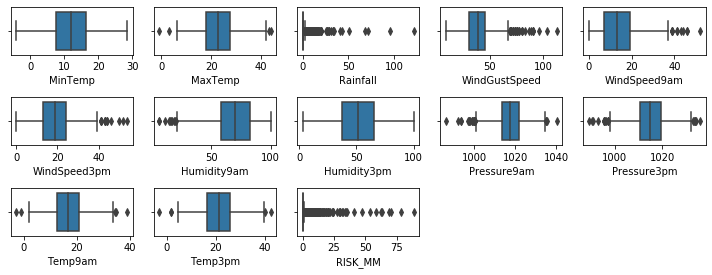

In [15]:
#b. Do variables have outliers?
n=1 
plt.figure(figsize=(10,6))
for i in df.describe().columns: 
    plt.subplot(5,5,n)
    sns.boxplot(df[i])
    n+=1
    plt.tight_layout()
# There are outliers present in the dataframe 

In [16]:
# Treating the outliers
for i in df.describe().columns:
    ll,q1,q3,ul=df[i].quantile([0.01,0.25,0.75,0.95])
    LL=q1-1.5*(q3-q1)
    UL=q3+1.5*(q3-q1)
    df[i]=df[i].map(lambda x: ll if x<LL else ul if x>UL else x)

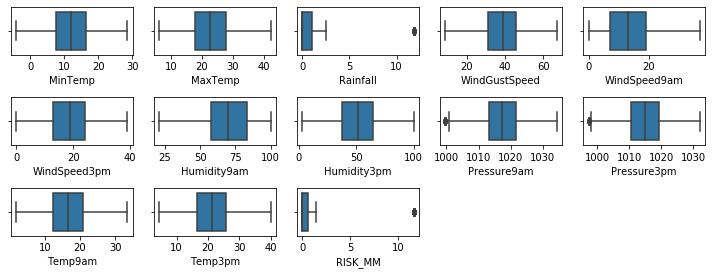

In [17]:
#After treating outliers
n=1 
plt.figure(figsize=(10,6))
for i in df.describe().columns: 
    plt.subplot(5,5,n)
    sns.boxplot(df[i])
    n+=1
    plt.tight_layout()
# There are no outliers present in the dataframe 

MinTemp 0.10524298238921706
MaxTemp 0.3166956271963408
Rainfall 1.6949008716782052
WindGustSpeed 0.33750953152615143
WindSpeed9am 0.42540922272825477
WindSpeed3pm 0.18057958747887193
Humidity9am -0.3716828172432643
Humidity3pm 0.03167888587016855
Pressure9am -0.23914067096980493
Pressure3pm -0.19845573474805822
Temp9am 0.1331771287858365
Temp3pm 0.33024682475010414
RISK_MM 1.624637041990758


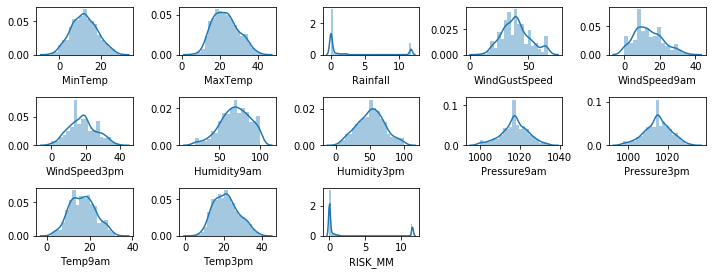

In [18]:
#c. Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem.
n=1 
plt.figure(figsize=(10,6))
for i in df.describe().columns: 
    plt.subplot(5,5,n)
    sns.distplot(df[i])
    print(i,df[i].skew())
    n+=1
    plt.tight_layout()
# all the variables are nearly normally distributed except a few. 

In [19]:
# Target Variable
df['RainTomorrow'].value_counts()
# The data is not normally distributed. We need to apply some encoding to check the further analysis on target variable

No     829
Yes    211
Name: RainTomorrow, dtype: int64

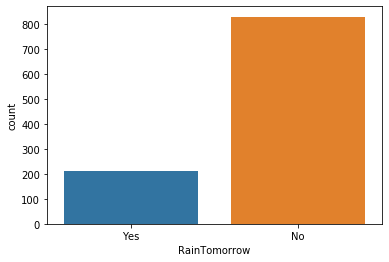

In [21]:
sns.countplot(df['RainTomorrow'])
plt.show()

### 4.	Summarize relationships among variables             
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


##### a. Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

In [22]:
df['RainToday']=df['RainToday'].apply(lambda x:0 if x=='NO' else 1)
df['RainTomorrow']=df['RainTomorrow'].apply(lambda x:0 if x=='No'else 1)

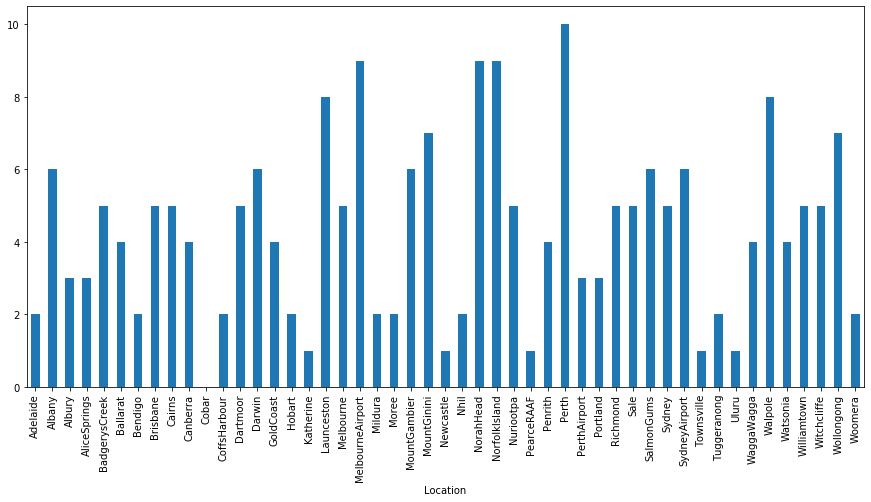

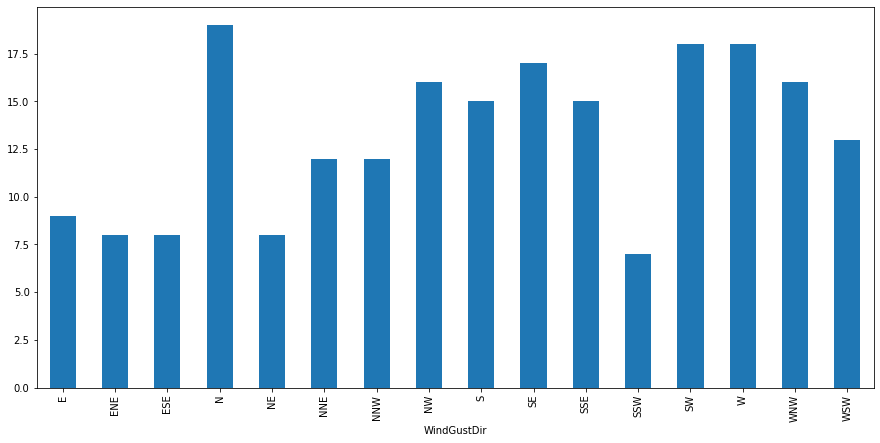

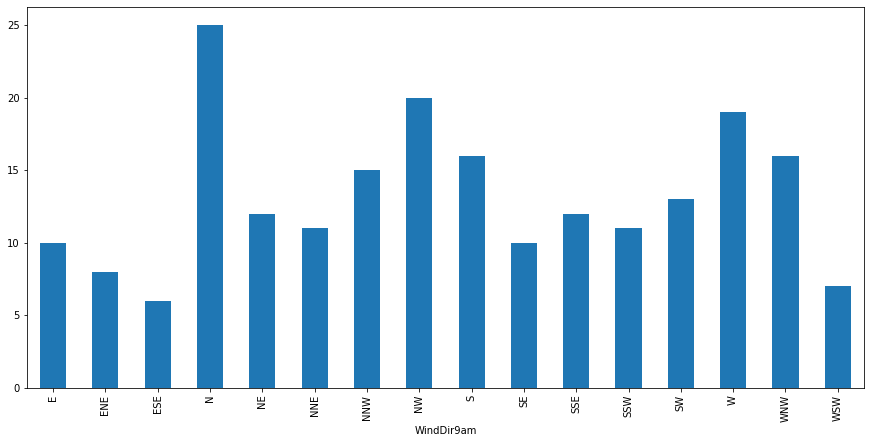

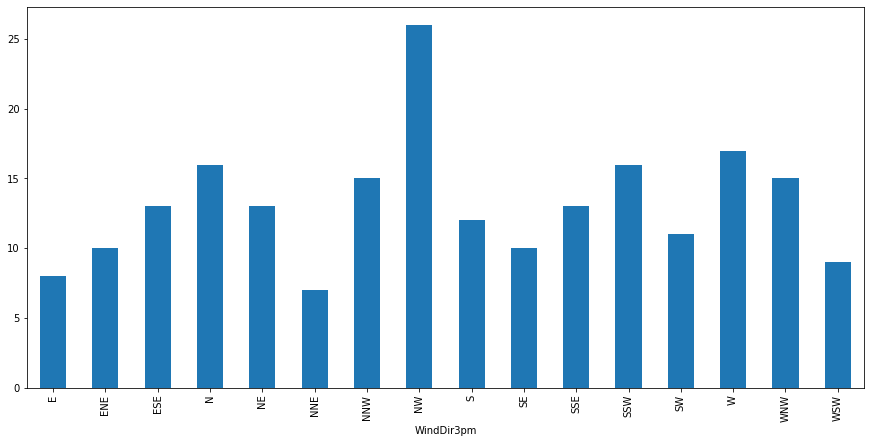

In [23]:
for i in df.drop(columns=['Date']).select_dtypes(include='object').columns:
    plt.figure(figsize=(15,7))
    df.groupby(by=i).sum()['RainTomorrow'].plot(kind='bar')
    plt.show()

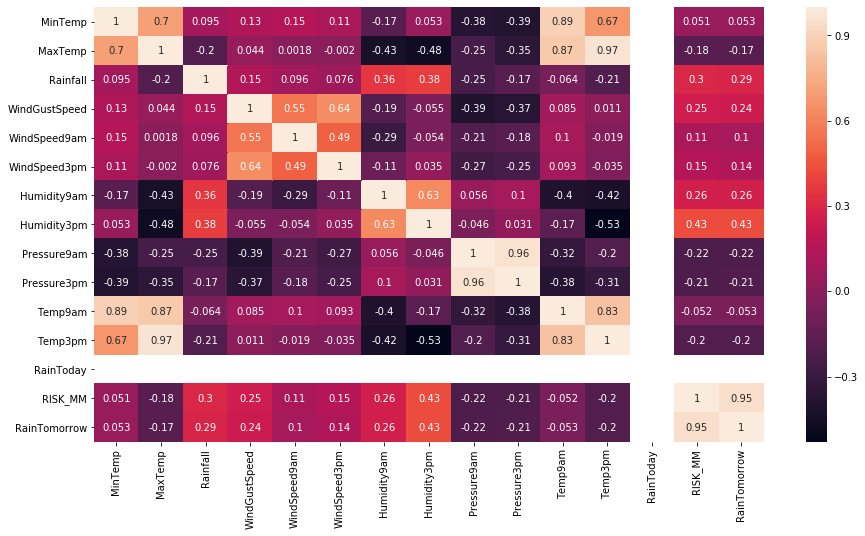

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### b. Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

In [24]:
from scipy import stats 
from scipy.stats import chi2_contingency , ttest_ind

In [25]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

In [26]:
col=[ 'Date','Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',]

In [27]:
cat=[]
num=[]
for i in col: 
    if df[i].dtypes=='object':
        observed=pd.crosstab(df[i],df['RainTomorrow'])
        zstat,pvalue,ddof,expected=chi2_contingency(observed,correction=False)
        print(f'pvalue for {i} and RainTomorrow is {pvalue}')
        print()
    else: 
        zstat,pvalue=stats.ttest_ind(df[i],df['RainTomorrow'])
        print(f'pvalue for {i} and RainTomorrow is {pvalue}')
        print()

pvalue for Date and RainTomorrow is 0.15796595622513723

pvalue for Location and RainTomorrow is 0.13062372786451518

pvalue for MinTemp and RainTomorrow is 0.0

pvalue for MaxTemp and RainTomorrow is 0.0

pvalue for Rainfall and RainTomorrow is 9.617231648207645e-47

pvalue for WindGustDir and RainTomorrow is 0.727055094460362

pvalue for WindGustSpeed and RainTomorrow is 0.0

pvalue for WindDir9am and RainTomorrow is 0.26826595282857335

pvalue for WindDir3pm and RainTomorrow is 0.12434891184904377

pvalue for WindSpeed9am and RainTomorrow is 0.0

pvalue for WindSpeed3pm and RainTomorrow is 0.0

pvalue for Humidity9am and RainTomorrow is 0.0

pvalue for Humidity3pm and RainTomorrow is 0.0

pvalue for Pressure9am and RainTomorrow is 0.0

pvalue for Pressure3pm and RainTomorrow is 0.0

pvalue for Temp9am and RainTomorrow is 0.0

pvalue for Temp3pm and RainTomorrow is 0.0

pvalue for RainToday and RainTomorrow is 0.0

pvalue for RISK_MM and RainTomorrow is 8.101978462854528e-46



In [28]:
# Encoding 
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
cat=df.select_dtypes(include='object').columns
df[cat]=oe.fit_transform(df[cat])

In [29]:
# Since data is not evenly distributed , we will perform SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=10)
X,y=sm.fit_resample(df.drop(columns=['RainTomorrow']),df['RainTomorrow'])


In [30]:
y.value_counts()
# After performing SMOTE we can see that values are evenly distributed and there is no imbalance


1    829
0    829
Name: RainTomorrow, dtype: int64

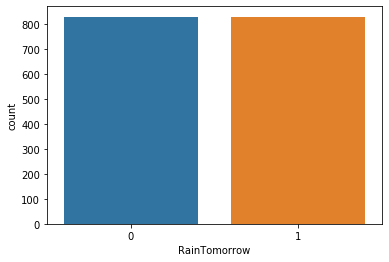

In [31]:
sns.countplot(y)
plt.show()

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.select_dtypes(exclude='object').values,i)for i in range(len(df.select_dtypes(exclude='object').columns))]
vif['feature']=df.select_dtypes(exclude='object').columns

In [66]:
vif.sort_values('vif',ascending=False)

,vif,feature
17,37665.225146,RainToday
16,22.169020,Temp3pm
3,21.811224,MaxTemp
13,18.821205,Pressure9am
14,18.463532,Pressure3pm
15,17.832763,Temp9am
18,10.750538,RISK_MM
19,10.655362,RainTomorrow
2,7.706977,MinTemp
12,5.156122,Humidity3pm


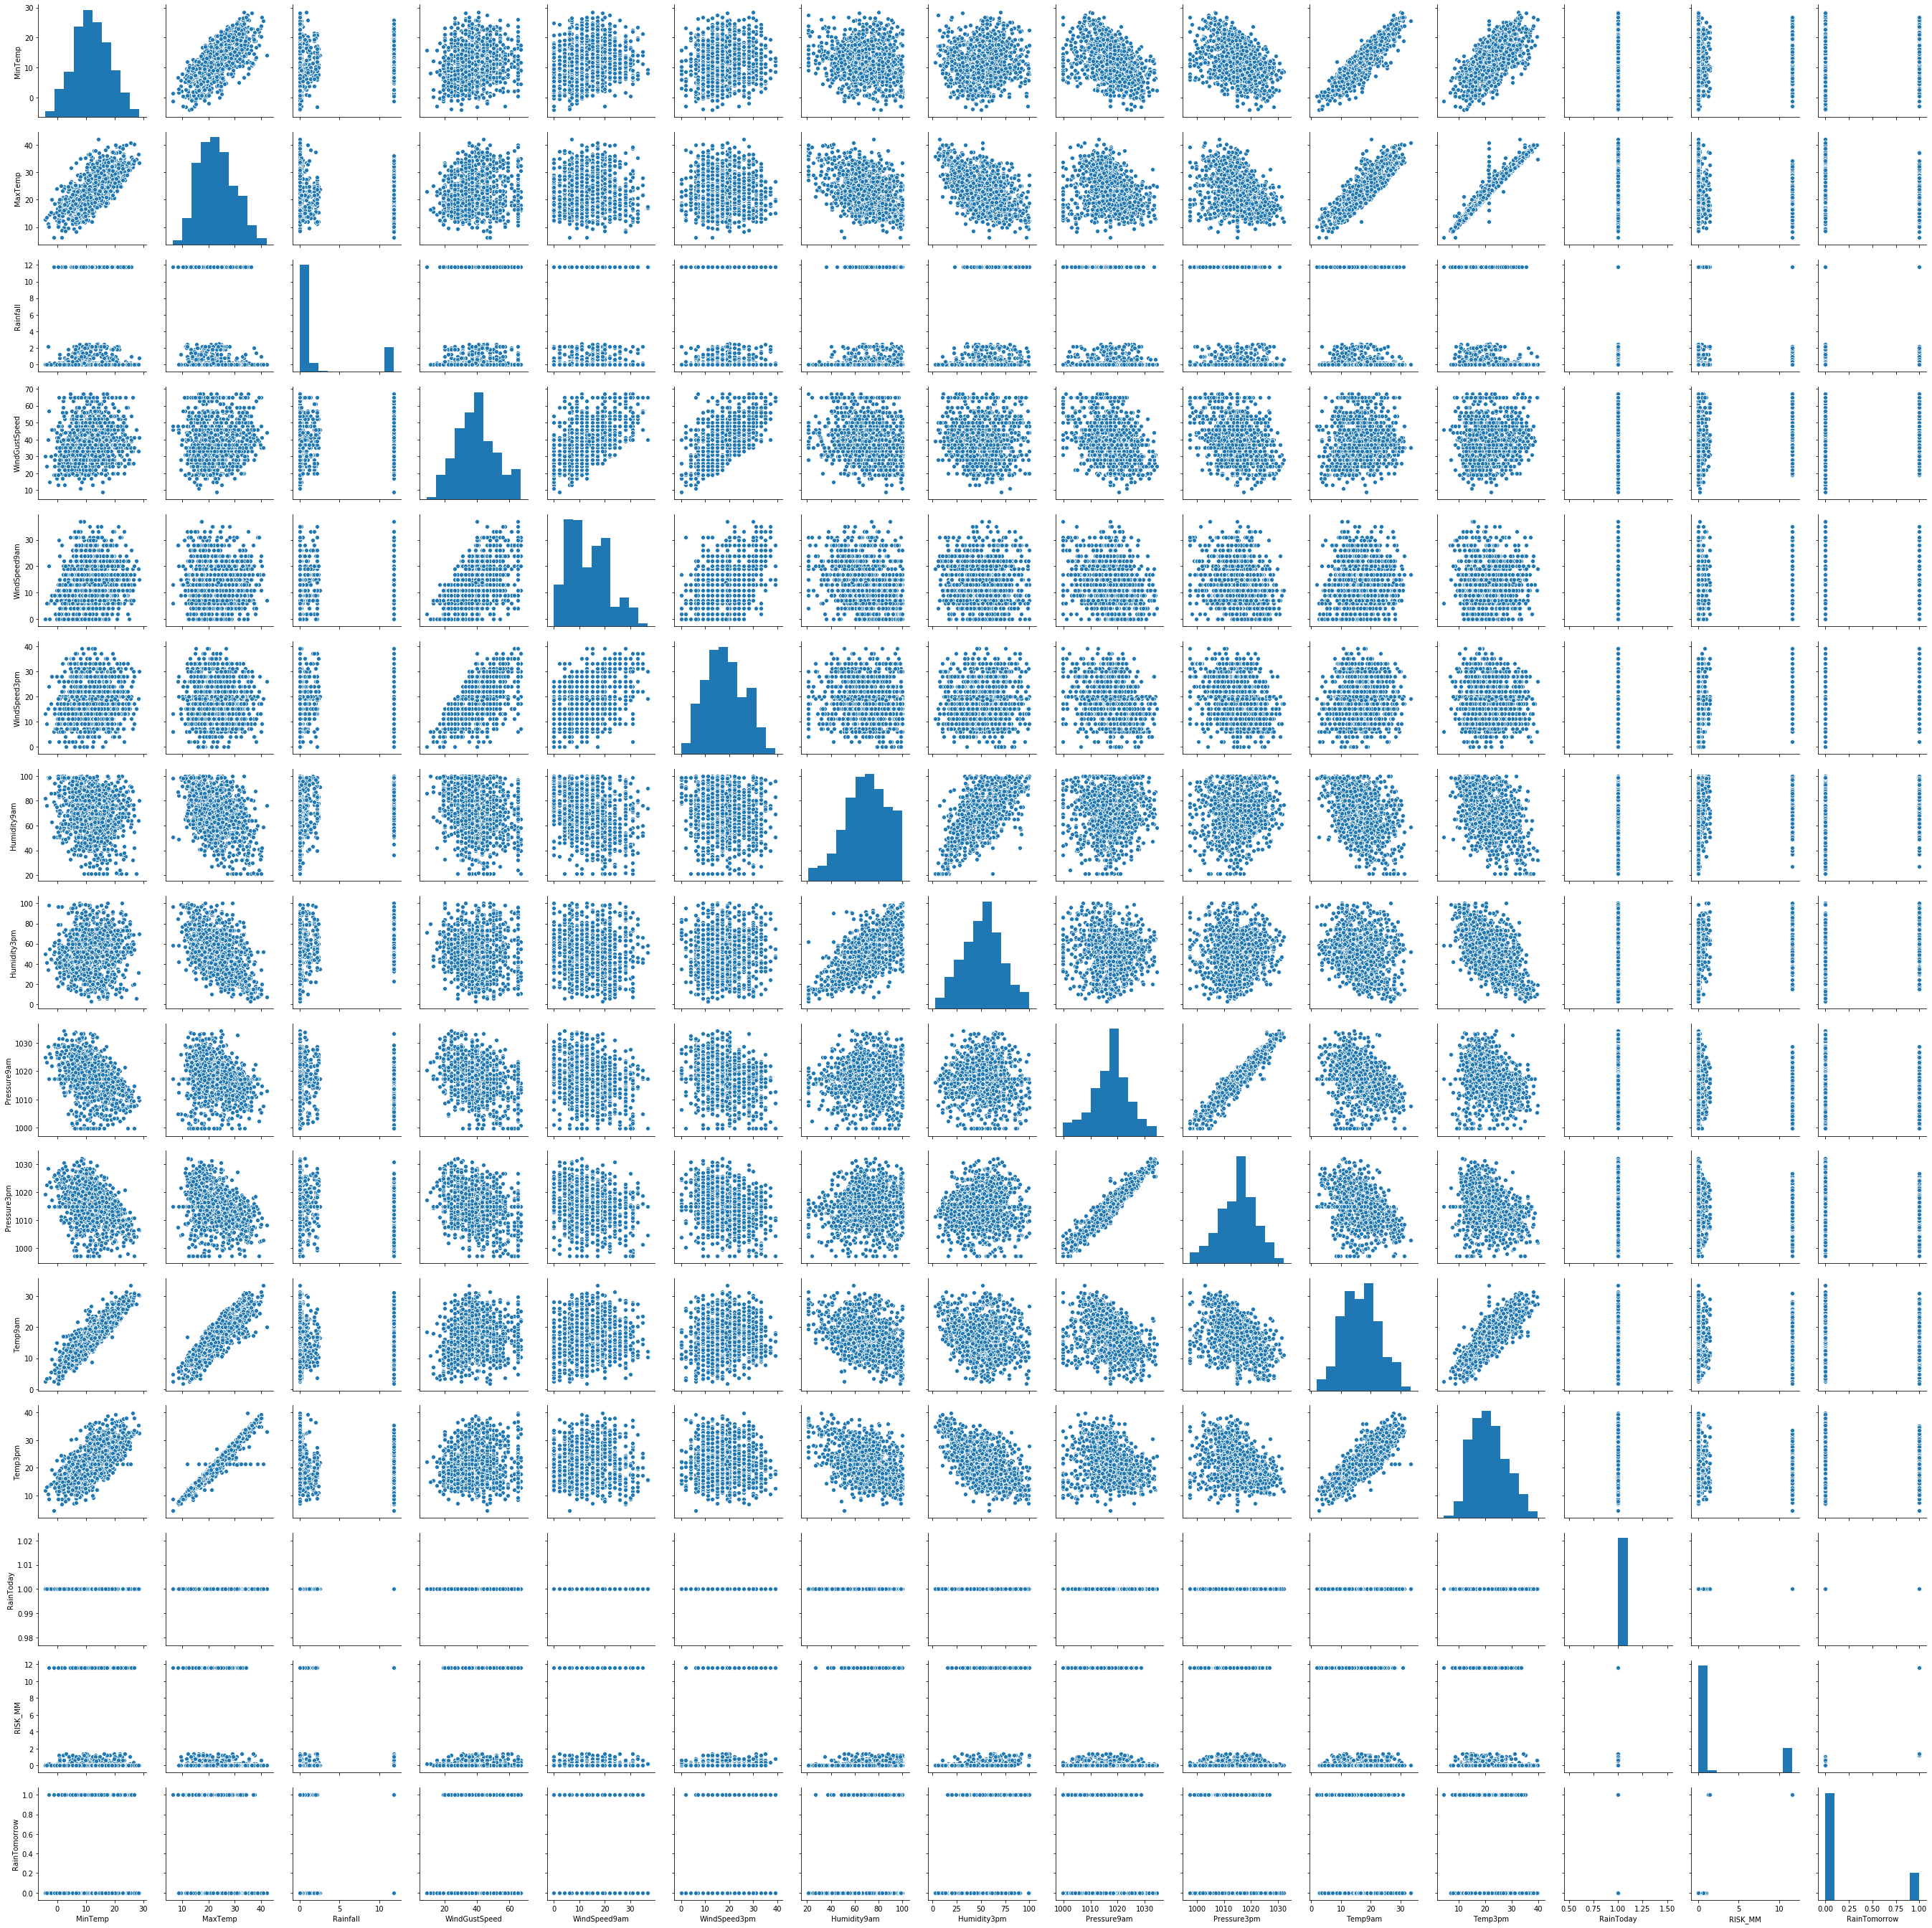

In [25]:
# to show the relationship with the target variable
sns.pairplot(df)
plt.show()
# rain today is not related to the target variable 

### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [33]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['RainTomorrow']),
                                                      df['RainTomorrow'],test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(728, 19)
(312, 19)
(728,)
(312,)


In [34]:
from scipy.stats import f_oneway
f_oneway(y_train,y_test,df['RainTomorrow'])
# Since p value > 0.05 , we can say that both the train and test are overall representative of the data 

F_onewayResult(statistic=0.4594751658950161, pvalue=0.6316792367271927)

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model

e.	Which other key model output parameters do you want to look at? 


##### a. What is the overall Accuracy? Please comment on whether it is good or not.

In [35]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression , PassiveAggressiveClassifier 
logit=PassiveAggressiveClassifier()
logit.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [36]:
# prediction 
y_pred=logit.predict(x_test)
print('Accuracy of model: ',logit.score(x_train,y_train))

Accuracy of model:  0.8543956043956044


##### b. What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       243
           1       0.87      0.38      0.53        69

    accuracy                           0.85       312
   macro avg       0.86      0.68      0.72       312
weighted avg       0.85      0.85      0.83       312



##### c. Which variables are significant?

In [38]:
logit.coef_

array([[-1.73095243e-03,  1.10520979e-04,  2.36997081e-03,
        -9.76296454e-04,  3.91031959e-03,  6.50902226e-04,
         1.28754778e-02, -4.02749777e-04, -6.37384429e-04,
         2.40539873e-03,  4.76344824e-03,  9.62788957e-03,
         2.03600841e-02, -1.21019995e-03, -1.47825118e-03,
         9.35628728e-04, -1.24959377e-03,  6.09986454e-06,
         1.98051019e-02]])

In [45]:
y_cf=[-1.73095243e-03,  1.10520979e-04,  2.36997081e-03,
        -9.76296454e-04,  3.91031959e-03,  6.50902226e-04,
         1.28754778e-02, -4.02749777e-04, -6.37384429e-04,
         2.40539873e-03,  4.76344824e-03,  9.62788957e-03,
         2.03600841e-02, -1.21019995e-03, -1.47825118e-03,
         9.35628728e-04, -1.24959377e-03,  6.09986454e-06,
         1.98051019e-02]

In [46]:
signi=pd.DataFrame(data=y_cf,index=x_train.columns,columns=['Significant'])
signi[signi['Significant']<0.05]

,Significant
Date,-0.001731
Location,0.000111
MinTemp,0.002370
MaxTemp,-0.000976
Rainfall,0.003910
WindGustDir,0.000651
WindGustSpeed,0.012875
WindDir9am,-0.000403
WindDir3pm,-0.000637
WindSpeed9am,0.002405


##### d. What is Cohen’s Kappa Value and what inference do you make from the model

In [42]:
print("Cohen's Kappa Value: ",cohen_kappa_score(y_test,y_pred))
# Cohen's kappa value expresses the level of agreement between two annotators on a classification problem 
# Cohen's Kappa Value is  0.45 , so level of agreemnet is moderate

Cohen's Kappa Value:  0.4517720951099148


##### e. Which other key model output parameters do you want to look at?

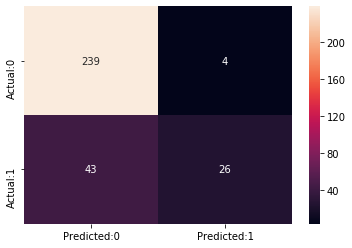

In [43]:
# Confusion matrix - it is a table that is used to define the performance of classification problem 
cm = confusion_matrix(y_test,y_pred)
mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(mat,annot=True,fmt="d")
plt.show()

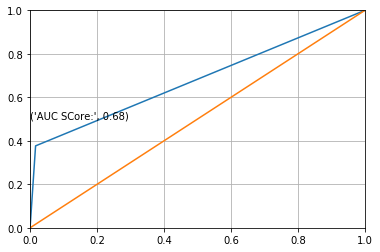

In [47]:
# Roc Curve  
from sklearn import metrics
fpr,tpr , thresh =roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.text(x=0,y=0.5,s=('AUC SCore:',round(metrics.roc_auc_score(y_test,y_pred),3)))
plt.grid()
plt.show()
# AUC Score is poor .. model needs to be improved 

### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. 
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [48]:
# Model 1 : 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
pipe=Pipeline((
('st',StandardScaler()),
('dr',DecisionTreeClassifier()),))
pipe.fit(x_train,y_train)

Pipeline(steps=[('st', StandardScaler()), ('dr', DecisionTreeClassifier())])

Accuracy score: 1.0


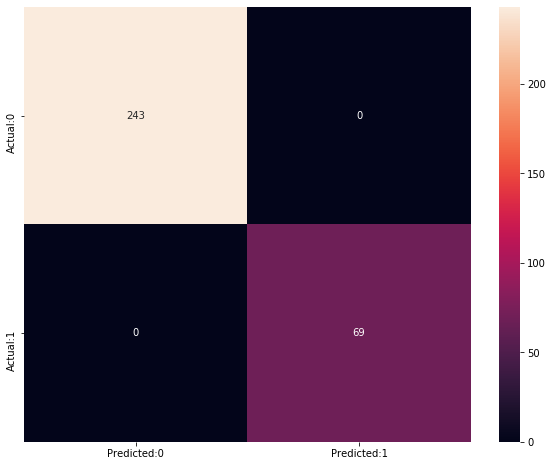

In [49]:
# Accuracy and confusion matrix
y_pred=pipe.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,8))
sns.heatmap(mat,annot=True,fmt="d")
plt.show()

In [51]:
# Model 2 
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PowerTransformer
pipe2=Pipeline((
('st',PowerTransformer()),
('dr',SGDClassifier()),))
pipe2.fit(x_train,y_train)

Pipeline(steps=[('st', PowerTransformer()), ('dr', SGDClassifier())])

Accuracy score: 0.9839743589743589


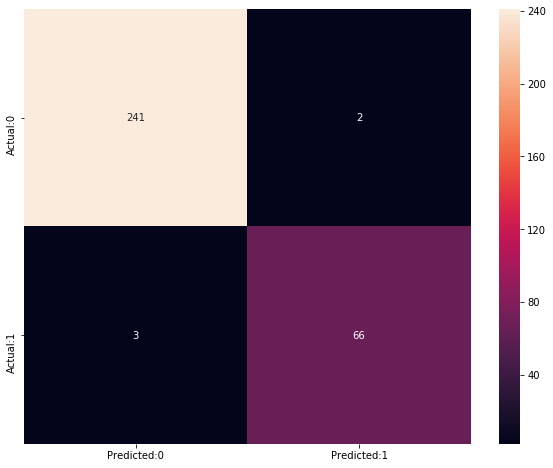

In [52]:
# Accuracy and confusion matrix
y_pred=pipe2.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,8))
sns.heatmap(mat,annot=True,fmt="d")
plt.show()

In [53]:
# Model 3 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer
pipe3=Pipeline((
('st',FunctionTransformer()),
('dr',KNeighborsClassifier()),))
pipe3.fit(x_train,y_train)

Pipeline(steps=[('st', FunctionTransformer()), ('dr', KNeighborsClassifier())])

Accuracy score: 0.8461538461538461


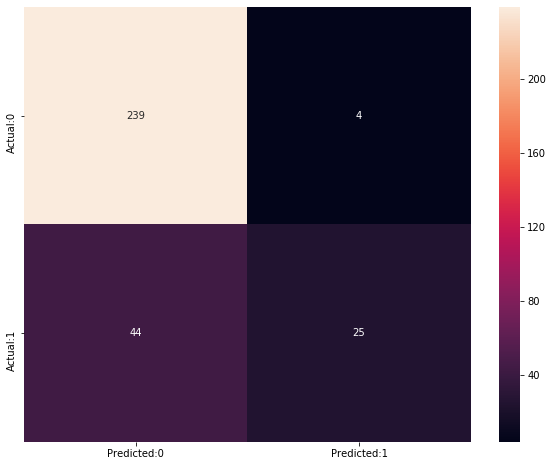

In [54]:
# Accuracy and confusion matrix
y_pred=pipe3.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,8))
sns.heatmap(mat,annot=True,fmt="d")
plt.show()

In [56]:
# Model4 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
pipe4=Pipeline((
('st',PolynomialFeatures()),
('dr',MLPClassifier()),))
pipe4.fit(x_train,y_train)

Pipeline(steps=[('st', PolynomialFeatures()), ('dr', MLPClassifier())])

Accuracy score: 0.9775641025641025


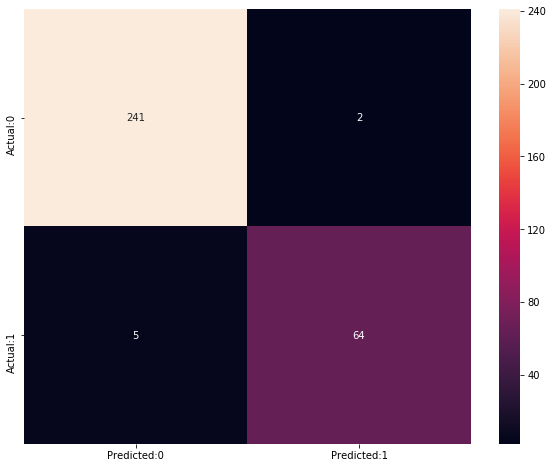

In [57]:
# Accuracy and confusion matrix
y_pred=pipe4.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,8))
sns.heatmap(mat,annot=True,fmt="d")
plt.show()

In [58]:
# Model 5
import xgboost
from xgboost import XGBClassifier
pipe5=Pipeline((
('st',XGBClassifier()),))
pipe5.fit(x_train,y_train)

Pipeline(steps=[('st', XGBClassifier())])

Accuracy score: 1.0


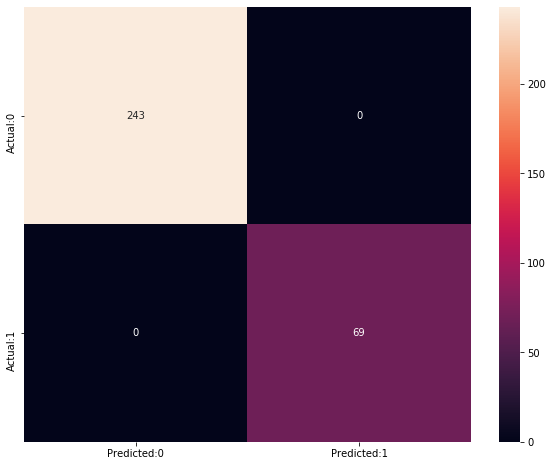

In [59]:
# Accuracy and confusion matrix
y_pred=pipe5.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,8))
sns.heatmap(mat,annot=True,fmt="d")
plt.show()

### 8.	Summarize as follows 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


###### 1.Summarize the overall fit of the model and list down the measures to prove that it is a good model

##### 2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

In [60]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier

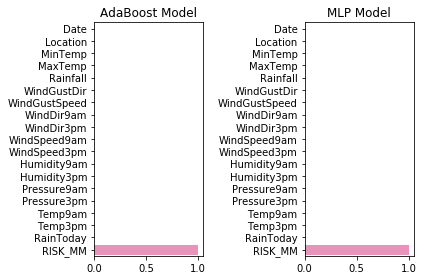

In [61]:
sgd=GradientBoostingClassifier()
sgd.fit(x_train,y_train)
mult=AdaBoostClassifier()
mult.fit(x_train,y_train)
plt.subplot(1,2,1)
sns.barplot(x=sgd.feature_importances_,y=x_train.columns)
plt.title('AdaBoost Model')

plt.subplot(1,2,2)
sns.barplot(x=mult.feature_importances_,y=x_train.columns)
plt.title('MLP Model')
plt.tight_layout()

###### 3.	What changes from the base model had the most effect on model performance?

##### 4.	What are the key risks to your results and interpretation?